# **Importing Common Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Importing Libraries**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")

**Performing EDA (Exploratory Data Analysis)**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Total count of  Number of Exited and Non exited Customers
df.Exited.value_counts()

,count
Exited,
0,7963
1,2037


**Deleting Unwanted Columns**

In [6]:
df.drop("Surname", axis=1, inplace=True)

In [7]:
df.drop("CustomerId",axis = 1, inplace = True)

In [8]:
df.drop("RowNumber" , axis = 1, inplace =True)

In [9]:
df.shape

(10000, 11)

In [10]:
print("Average Age : ",df['Age'].mean())
print("Median Age : ",df['Age'].median())
df['Age'].unique()

Average Age :  38.9218
Median Age :  37.0


array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

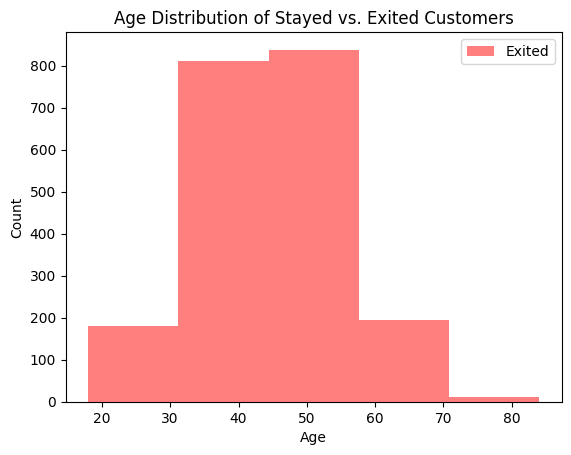

In [11]:

plt.hist(df[df['Exited'] == 1]['Age'], bins=5, alpha=0.5, label='Exited', color='red')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Stayed vs. Exited Customers')
plt.legend()
plt.show()

In [12]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [14]:

df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [15]:
#Deleting Is Active Member actually increased the  Accuracy
df.drop("IsActiveMember" , axis = 1, inplace =True)


Exploring how credit score vary

In [16]:
print("Minimum Credit score ",df['CreditScore'].min())
print("Maximum Credit score ",df['CreditScore'].max())
print("Average : ",df['CreditScore'].mean())
print("Median : ",df['CreditScore'].median())

Minimum Credit score  350
Maximum Credit score  850
Average :  650.5288
Median :  652.0


Females have exited more compared to Males ,even though males are the major Customers

In [ ]:
exit_counts = df[df['Exited'] == 1]['Gender'].value_counts()
print("Exited Count of Male and female",exit_counts)
df['Gender'].value_counts()

Exited Count of Male and female Gender
Female    1139
Male       898
Name: count, dtype: int64


,count
Gender,
Male,5457
Female,4543


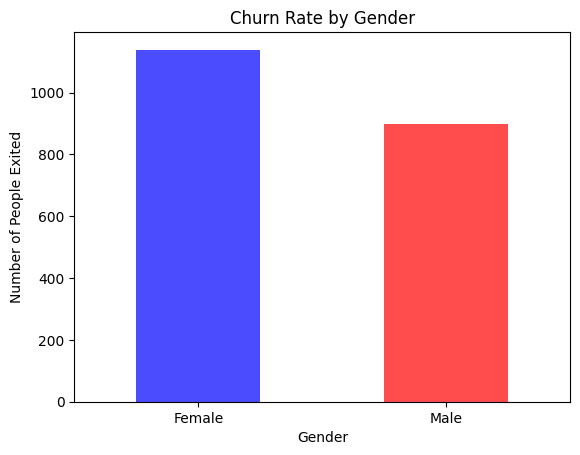

In [17]:

exit_counts = df[df['Exited'] == 1]['Gender'].value_counts()

# Create Bar Plot
exit_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7)

plt.xlabel("Gender")
plt.ylabel("Number of People Exited")
plt.title("Churn Rate by Gender")
plt.xticks(rotation=0)
plt.show()


In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [19]:
df['Geography'].unique()
df['Geography'] = df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 2})

<ipython-input-19-866379ff6223>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 2})


Replacing Males and Females to 0 and 1

In [20]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


<ipython-input-20-d5551b052bbe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [21]:
y = df['Exited']
X = df.drop('Exited', axis=1)

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,112542.58
2,502,0,1,42,8,159660.80,3,1,113931.57
3,699,0,1,39,1,0.00,2,0,93826.63
4,850,2,1,43,2,125510.82,1,1,79084.10


In [23]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


Spliting the Data to train and Test

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
i am using Random forest model because this model refines and checks for all the possiblities

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.85%


Scaled version


Standardizing the  Data to Train to improve the accuracy


In [26]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

As we can see the output that accuracy as increased from 85.85 to 86.06%

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


y_pred = rf_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.05%


Joblib - To save a trained scikit-learn model: from joblib import dump; dump(model, 'my_model.joblib').  To load it back: from joblib import load; loaded_model = load('my_model.joblib').

In [29]:
from joblib import dump, load
# Save the model to a joblib file
dump(rf_classifier, 'my_model.joblib')

# Load the model from the joblib file
loaded_model = load('my_model.joblib')

In [32]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.05%
